In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sqlite3
conn = sqlite3.connect("./data/m4_survey_data.sqlite") # open a database connection

In [3]:
def transform_topn_dataset(df, tech, n = 10):
    '''
    df: dataframe - dataframe to transform
    n: integer - numbert of top technologies
    tech: string - can be Language, Database, Platfrom
    '''
    # Renaming MainBranch values as categorical 
    df.loc[df['MainBranch'] == 'I am a developer by profession', 'MainBranch'] = 'primarly dev'
    df.loc[df['MainBranch'] == 'I am not primarily a developer, but I write code sometimes as part of my work', 'MainBranch'] = 'not primarly dev'
    
    # Renaming Column MainBranch and setting as category
    df = df.rename(columns={'MainBranch':'Developer Type'})
    df['Developer Type'] = df['Developer Type'].astype('category')
    df['Developer Type'].cat.reorder_categories(['primarly dev', 'not primarly dev'])
    
    # Computing the overall top n technologies
    top_n_languages = (df
                        .groupby([tech])['Id']
                        .count()
                        .sort_values(ascending = False)
                       )[:n].index.to_list()
    
    # filtering the top n technologies and rearranging the dataframe to be visualised in a stacked barchart
    df_topn = (df[df[tech].isin(top_n_languages)]
                .groupby([tech, 'Developer Type'])
                .count()
                .reset_index()
                .pivot(index=tech, columns='Developer Type', values='Id')
                .reset_index()
               )
    
    df_topn[tech] = df_topn[tech].astype('category')
    df_topn[tech] = df_topn[tech].cat.reorder_categories(top_n_languages)
    df_topn = df_topn.sort_values(tech, ascending=False)

    return(df_topn)

# IBM Capstone - Developers and Technologies trends

## Methodologies and Approach

The data are extracted from a [SQLite database provided by Coursera](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite). This database is a subset of the original, complete dataset containing survey results by Stack Overflow website. 

Through SQL queries, the relevant data were extracted from the database, processed using Python libraries (`pandas`, `numpy`) and plotted (`seaborn`, `matplotlib`).

## Technologies Trends - Languages and Databases

### Top 10 Languages Respondent are currenlty working with (as for 2019)

- The Question:
> What are the top 10 Programming Languages the participants to the survey are currently working with?

The Survey partecipants, could input a list of the programming languages they are currently working with. They can also identify themselves as `Primarly Developer` or `Not a developer but coding as part of their job`. The following barcharts, visualize the top 10 languages inputted by respondent to the survey. 

In [4]:
# joining the LanguageWorkedWith table with master on Respondent

QUERY = """
SELECT LanguageWorkedWith.Respondent as Id, LanguageWorkedWith.LanguageWorkedWith as Language, master.MainBranch
FROM LanguageWorkedWith
JOIN master
ON LanguageWorkedWith.Respondent = master.Respondent
"""

df_languages_workingwith = pd.read_sql_query(QUERY,conn)
df_languages_workingwith.head()

,Id,Language,MainBranch
0,4,C,I am a developer by profession
1,4,C++,I am a developer by profession
2,4,C#,I am a developer by profession
3,4,Python,I am a developer by profession
4,4,SQL,I am a developer by profession


In [5]:
df_languages_workingwith.Id.nunique()

11387

In [6]:
df_plot = transform_topn_dataset(df_languages_workingwith, 'Language')

Text(0, 0.5, 'Language')

<Figure size 640x480 with 0 Axes>

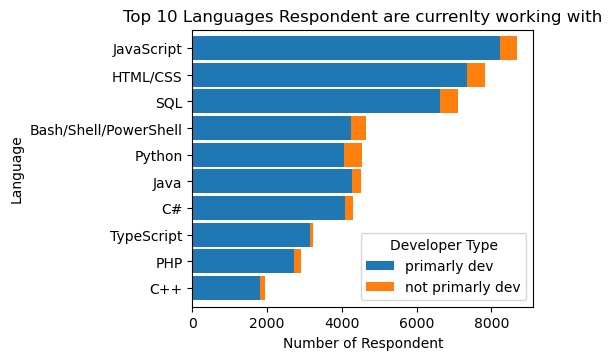

In [7]:
plt.figure()

im = df_plot[['primarly dev', 'not primarly dev', 'Language']].plot(kind = 'barh',
                                                                               title = 'Top 10 Languages Respondent are currenlty working with',
                                                                               x = 'Language',
                                                                               stacked = True,
                                                                               width=0.9,
                                                                               figsize=(4.4, 3.6)).get_figure();

plt.xlabel('Number of Respondent')
plt.ylabel('Language')
# im.savefig("DatabaseNextYear.png", bbox_inches='tight');

### Top 10 Languages Respondent are Willing to Learn for Next Year (as for 2019)

In [8]:
QUERY = """
SELECT LanguageDesireNextYear.Respondent as Id, LanguageDesireNextYear.LanguageDesireNextYear as Language, master.MainBranch
FROM LanguageDesireNextYear
JOIN master
ON LanguageDesireNextYear.Respondent = master.Respondent
"""

df_languages_next_year = pd.read_sql_query(QUERY,conn)
df_languages_next_year.head()

,Id,Language,MainBranch
0,4,C,I am a developer by profession
1,4,C#,I am a developer by profession
2,4,JavaScript,I am a developer by profession
3,4,SQL,I am a developer by profession
4,9,Bash/Shell/PowerShell,I am a developer by profession


In [9]:
df_languages_next_year.Id.nunique()

11264

In [10]:
df_plot = transform_topn_dataset(df_languages_next_year, 'Language')

Text(0, 0.5, 'Language')

<Figure size 640x480 with 0 Axes>

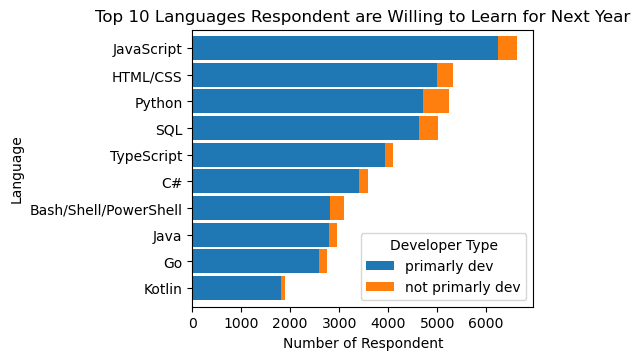

In [11]:
plt.figure()

im = df_plot[['primarly dev', 'not primarly dev', 'Language']].plot(kind = 'barh',
                                                                               title = 'Top 10 Languages Respondent are Willing to Learn for Next Year',
                                                                               x = 'Language',
                                                                               stacked = True,
                                                                               width=0.9,
                                                                               figsize=(4.4, 3.6)).get_figure();

plt.xlabel('Number of Respondent')
plt.ylabel('Language')

### Top 10 Databases Respondent are Currently Working With (as for 2019)

In [12]:
QUERY = """
SELECT DatabaseWorkedWith.Respondent as Id, DatabaseWorkedWith.DatabaseWorkedWith as Database, master.MainBranch
FROM DatabaseWorkedWith
JOIN master
ON DatabaseWorkedWith.Respondent = master.Respondent
"""

df_database_working_with = pd.read_sql_query(QUERY,conn)
df_database_working_with.head()

,Id,Database,MainBranch
0,4,MySQL,I am a developer by profession
1,4,SQLite,I am a developer by profession
2,9,DynamoDB,I am a developer by profession
3,9,PostgreSQL,I am a developer by profession
4,9,SQLite,I am a developer by profession


In [13]:
df_database_working_with.Id.nunique()

10945

In [14]:
df_plot = transform_topn_dataset(df_database_working_with, 'Database')

<Figure size 640x480 with 0 Axes>

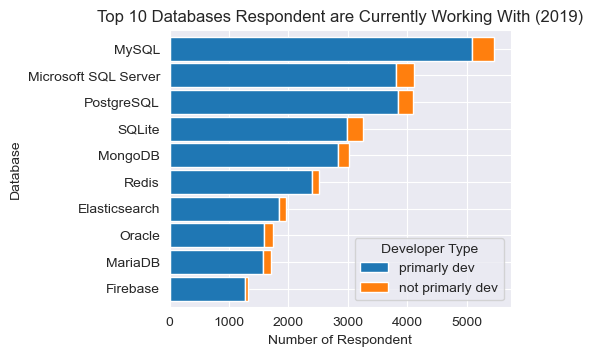

In [15]:
sns.set_style("darkgrid");

plt.figure();

im = df_plot[['primarly dev', 'not primarly dev', 'Database']].plot(kind = 'barh',
                                                                               title = 'Top 10 Databases Respondent are Currently Working With (2019)',
                                                                               x = 'Database',
                                                                               stacked = True,
                                                                               width=0.9,
                                                                               figsize=(4.4, 3.6)).get_figure();

plt.xlabel('Number of Respondent');
plt.ylabel('Database');

### Top 10 Databases Respondent are Willing to Learn for Next Year (as for 2019)

In [16]:
QUERY = """
SELECT DatabaseDesireNextYear.Respondent as Id, DatabaseDesireNextYear.DatabaseDesireNextYear as Database, master.MainBranch
FROM DatabaseDesireNextYear
JOIN master
ON DatabaseDesireNextYear.Respondent = master.Respondent
"""

df_database_next_year = pd.read_sql_query(QUERY,conn)
df_database_next_year.head()

,Id,Database,MainBranch
0,4,MySQL,I am a developer by profession
1,4,SQLite,I am a developer by profession
2,9,PostgreSQL,I am a developer by profession
3,9,Redis,I am a developer by profession
4,9,SQLite,I am a developer by profession


In [17]:
df_database_next_year.Id.nunique()

10356

In [18]:
df_plot = transform_topn_dataset(df_database_next_year, 'Database')

<Figure size 640x480 with 0 Axes>

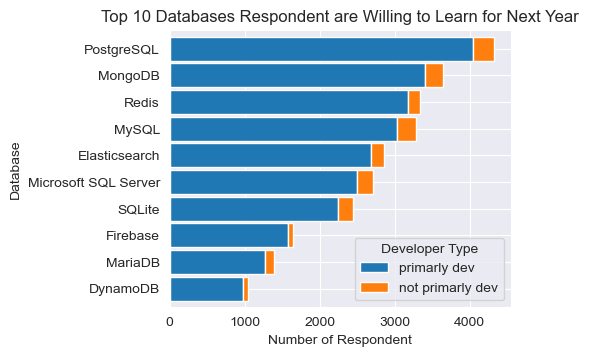

In [19]:
sns.set_style("darkgrid");

plt.figure();

im = df_plot[['primarly dev', 'not primarly dev', 'Database']].plot(kind = 'barh',
                                                                               title = 'Top 10 Databases Respondent are Willing to Learn for Next Year',
                                                                               x = 'Database',
                                                                               stacked = True,
                                                                               width=0.9,
                                                                               figsize=(4.4, 3.6)).get_figure();

plt.xlabel('Number of Respondent');
plt.ylabel('Database');

### Working Hours, Salary, Age, and Respondent Gender

We want now analyse the relationship between Working Hours, Salary, Age and Respondent Gender. We start querying the Database with 2 constraint: The respondent must also review her/his code and the respondent must be less than 75 years old (most countries retiring age). 

When we want to analyse economic and social features, like salary or gender distribution, one possible choice is to use Countries as a primary factor to make comparisons and see the differences between the different geographical areas.

In the following analysis, we will further filter the survey respondent to the ones belonging to the top 10 countries where developers reside.

In [20]:
QUERY = """
SELECT master.Respondent, Country, CurrencySymbol, CompTotal, CompFreq, ConvertedComp, WorkWeekHrs, CodeRevHrs, Age, DevType.DevType, Gender.Gender 
FROM master
INNER JOIN DevType
ON master.Respondent = DevType.Respondent
INNER JOIN Gender
ON DevType.Respondent = Gender.Respondent
WHERE CodeRevHrs > 0 AND Age < 75 AND WorkWeekHrs < 70 AND ConvertedComp < 500000
"""

df_data = pd.read_sql_query(QUERY,conn)
print(df_data.shape)
df_data.head()

(23228, 11)


,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,DevType,Gender
0,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,Database administrator,Man
1,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,DevOps specialist,Man
2,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,"Developer, QA or test",Man
3,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,"Developer, back-end",Man
4,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,"Developer, front-end",Man


In [21]:
df_data.ConvertedComp.max()

497412.0

In [22]:
df_data[df_data['Age'] > 70]

,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,DevType,Gender
9493,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,Database administrator,Man
9494,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,Designer,Man
9495,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,"Developer, back-end",Man
9496,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,"Developer, desktop or enterprise applications",Man
9497,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,"Developer, front-end",Man


In [23]:
QUERY = """
SELECT master.Respondent, Country, CurrencySymbol, CompTotal, CompFreq, ConvertedComp, WorkWeekHrs, CodeRevHrs, Age, Gender.Gender 
FROM master
JOIN Gender
ON master.Respondent = Gender.Respondent
WHERE CodeRevHrs > 0 AND Age < 75 AND WorkWeekHrs < 70 AND ConvertedComp < 500000
"""

df_data_t = pd.read_sql_query(QUERY,conn)
print(df_data_t.shape)
df_data_t.head()

(7479, 10)


,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,Gender
0,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,Man
1,13,United States,USD,90000.0,Yearly,90000.0,40.0,5.0,28.0,Man
2,17,Australia,AUD,90000.0,Yearly,65277.0,45.0,5.0,29.0,Man
3,19,Brazil,BRL,9500.0,Monthly,31140.0,8.0,3.0,31.0,Man
4,23,United States,USD,69000.0,Yearly,69000.0,40.0,8.0,22.0,Man


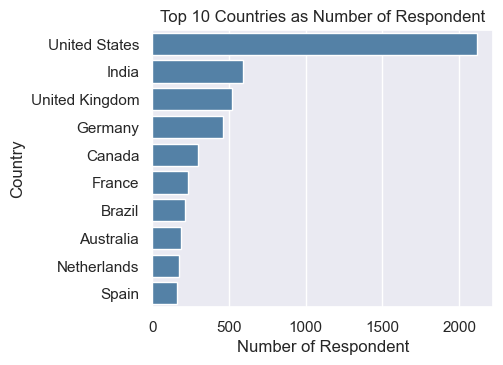

In [24]:
sns.set(rc={'figure.figsize':(4.4,3.6)})
sns.set_style("darkgrid")

ax = sns.barplot(
    df_data_t['Country'].value_counts()[:10].to_frame().reset_index(),
    x = 'count',
    y = 'Country',
    color = 'steelblue'
);

ax.set(xlabel='Number of Respondent',
#       ylabel='Weekly Working Hours',
       title='Top 10 Countries as Number of Respondent');

plt.savefig('test.png',  bbox_inches='tight')
# im.savefig("DatabaseNextYear.png", bbox_inches='tight');

In [25]:
df_data_top10_countries = df_data[df_data['Country'].isin(df_data_t['Country'].value_counts()[:10].index.to_list())]

In [26]:
df_data_top10_countries.isna().sum()

Respondent        0
Country           0
CurrencySymbol    0
CompTotal         0
CompFreq          0
ConvertedComp     0
WorkWeekHrs       0
CodeRevHrs        0
Age               0
DevType           0
Gender            0
dtype: int64

In [27]:
df_data_top10_countries[df_data_top10_countries['ConvertedComp'].isna()]['Respondent'].nunique()

0

In [28]:
df_data_top10_countries['Respondent'].nunique()

4897

In [29]:
(df_data_top10_countries
 .groupby('Country')
 .nunique()
)

,Respondent,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,DevType,Gender
Country,,,,,,,,,,
Australia,185,1,92,3,90,22,15,38,24,3
Brazil,209,3,106,3,110,20,15,30,24,3
Canada,294,3,114,3,116,27,18,33,23,3
France,230,4,112,3,114,25,13,32,23,3
Germany,458,4,181,3,185,33,17,36,24,3
India,585,4,249,3,264,34,23,27,24,3
Netherlands,174,1,105,3,106,21,15,29,24,3
Spain,162,4,79,2,86,21,15,29,23,2
United Kingdom,509,3,142,3,153,29,22,39,24,3


In [30]:
df_data_top10_countries[df_data_top10_countries['Country'] == 'Brazil']['CurrencySymbol'].unique()

array(['BRL', 'EUR', 'USD'], dtype=object)

In [31]:
sorted_index = (df_data_top10_countries
 .groupby('Country')
 .agg(compTotal_median = ('CompTotal', 'median'),
     convertedComp_median = ('ConvertedComp', 'median'),
     convertedComp_mean = ('ConvertedComp', 'mean'))
).sort_values('convertedComp_median', ascending = False).index

In [32]:
sorted_index.to_list()

['United States',
 'Australia',
 'Canada',
 'United Kingdom',
 'Germany',
 'Netherlands',
 'France',
 'Spain',
 'Brazil',
 'India']

In [33]:
# df_data_top10_countries['Country'] = df_data_top10_countries['Country'].astype('category') 

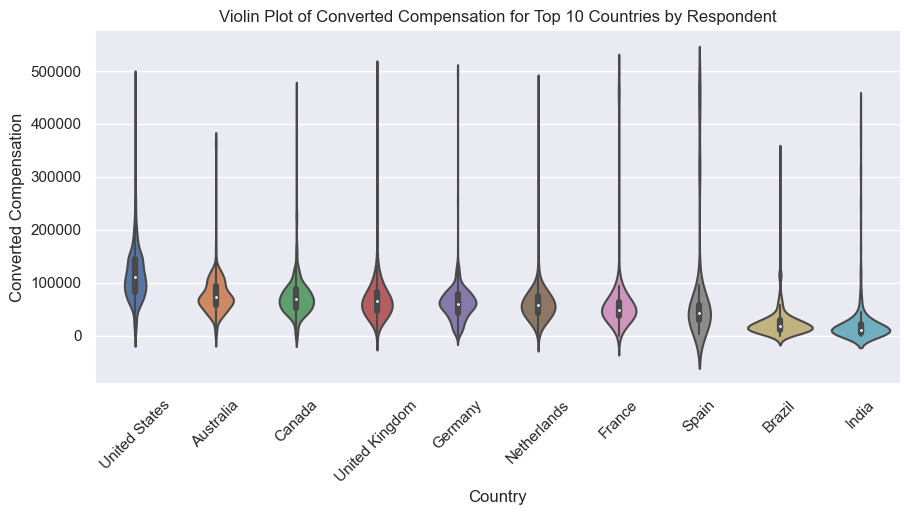

In [34]:
sns.set(rc={'figure.figsize':(10.4,4.6)})
sns.set_style("darkgrid")

my_plot = sns.violinplot(
    data = df_data_top10_countries,
    x = 'Country',
    y = 'ConvertedComp',
    order=sorted_index.to_list()
);

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45);
my_plot.set_ylabel("Converted Compensation");
my_plot.set_title("Violin Plot of Converted Compensation for Top 10 Countries by Respondent");

plt.savefig('CountriesConvertedCompDistribution.png',  bbox_inches='tight')

In [35]:
# sns.set(rc={'figure.figsize':(2.4,5.6)})
# sns.set_style("darkgrid")

# df_data_top10_countries.loc[df_data_top10_countries['Country'] == 'India']

# sns.violinplot(
#     data = df_data_top10_countries.loc[df_data_top10_countries['Country'] == 'India'],
#     x = 'Country',
#     y = 'CompTotal'
# )

In [36]:
# sns.set(rc={'figure.figsize':(14.4,5.6)})
# sns.set_style("darkgrid")

# my_plot = sns.violinplot(
#     data = df_data_top10_countries.loc[df_data_top10_countries['Country'] != 'India'],
#     # data = df_data_top10_countries,
#     x = 'Country',
#     y = 'CompTotal',
#     order=sorted_index.to_list()[1:]
#     # order=sorted_index.to_list()
# );

# my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45);

In [37]:
# sns.set(rc={'figure.figsize':(14.4,5.6)})
# sns.set_style("darkgrid")

# my_plot = sns.violinplot(
#     data = df_data_top10_countries.loc[(df_data_top10_countries['Country'] != 'India') &
#                                       (df_data_top10_countries['Country'] != 'United States')],
#     # data = df_data_top10_countries,
#     x = 'Country',
#     y = 'CompTotal',
#     order=sorted_index.to_list()[2:]
#     # order=sorted_index.to_list()
# );

# my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45);

### Pay gap

In [38]:
# df_test_pay_gap = (df_data_top10_countries
#  .groupby(['Respondent','Gender'])
#  # .agg(
#  #     ConvertedComp_mean = ('ConvertedComp', '')
#  # )
#  .last()
#  .reset_index()
#  .groupby(['Country', 'Gender'])
#  .agg(
#      comp_total_median = ('CompTotal', 'median'),
#      comp_total_mean = ('CompTotal', 'mean')
#  )
#  .sort_values('Gender')
#  .reset_index()
# )

In [39]:
df_test_pay_gap = (df_data_top10_countries
 .groupby(['Respondent','Gender'])
 # .agg(
 #     ConvertedComp_mean = ('ConvertedComp', '')
 # )
 .last()
 .reset_index()[['Respondent', 'Gender', 'Country', 'ConvertedComp', 'WorkWeekHrs']]
)

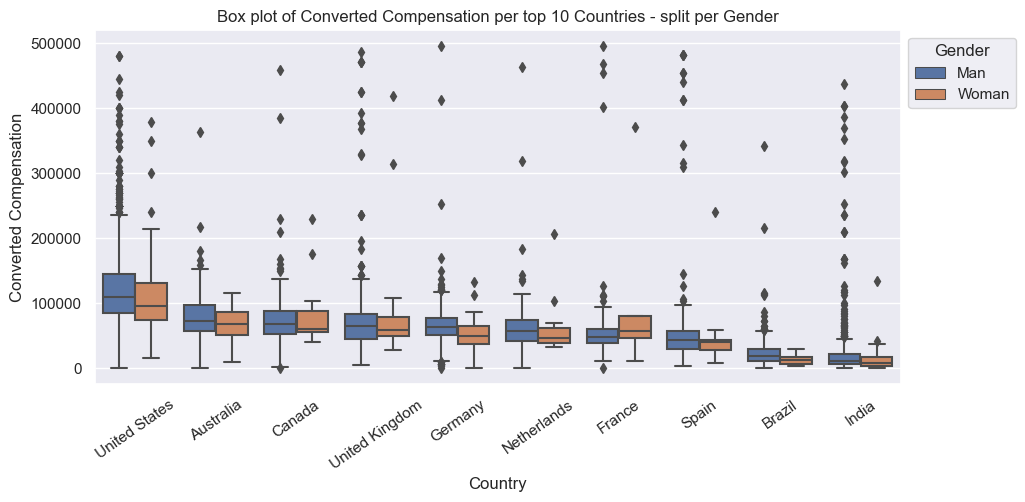

In [40]:
sns.set(rc={'figure.figsize':(10.4,4.6)})
sns.set_style("darkgrid")

ax = sns.boxplot(
    df_test_pay_gap[(df_test_pay_gap['Gender'] == 'Man') |(df_test_pay_gap['Gender'] == 'Woman')],
    x = 'Country',
    y = 'ConvertedComp',
    hue= 'Gender',
    order=sorted_index.to_list()
);

ax.set_ylabel("Converted Compensation")
ax.set_title("Box plot of Converted Compensation per top 10 Countries - split per Gender")
ax.set_xticklabels(ax.get_xticklabels(), rotation=35);

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('CountriesConvertedCompDistributionGender.png',  bbox_inches='tight')

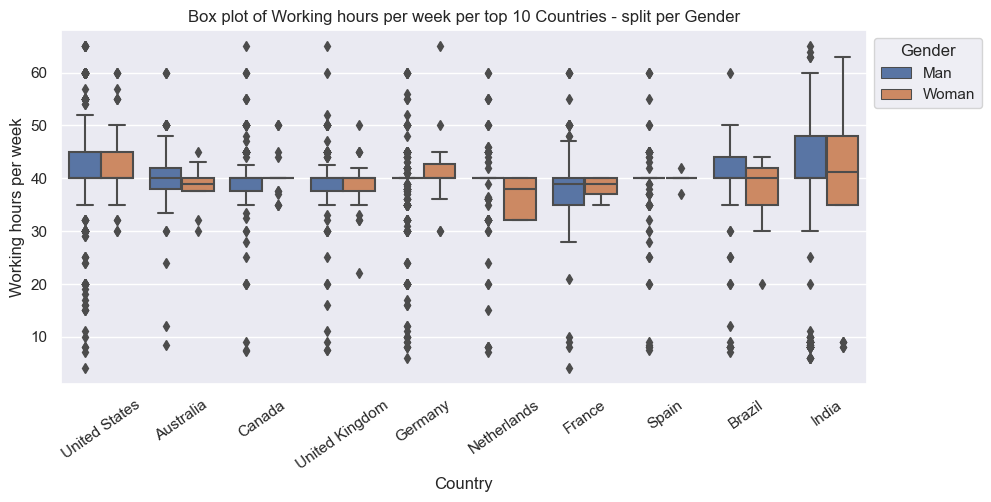

In [41]:
sns.set(rc={'figure.figsize':(10.4,4.6)})

ax = sns.boxplot(
    df_test_pay_gap[(df_test_pay_gap['Gender'] == 'Man') |(df_test_pay_gap['Gender'] == 'Woman')],
    x = 'Country',
    y = 'WorkWeekHrs',
    hue= 'Gender',
    order=sorted_index.to_list()
);

ax.set_ylabel("Working hours per week")
ax.set_title("Box plot of Working hours per week per top 10 Countries - split per Gender")
ax.set_xticklabels(ax.get_xticklabels(), rotation=35);

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('CountriesWorkingHoursDistributionGender.png',  bbox_inches='tight')

### How Long developers works?

In [42]:
df_data[df_data['Age'] > 70]

,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,DevType,Gender
9493,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,Database administrator,Man
9494,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,Designer,Man
9495,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,"Developer, back-end",Man
9496,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,"Developer, desktop or enterprise applications",Man
9497,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,"Developer, front-end",Man


In [43]:
df_working_hours = (df_data
                    .groupby(['Respondent'])
                    .first()
                    .reset_index()
)

print(df_working_hours.shape)
df_working_hours.head()

(7402, 11)


,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,DevType,Gender
0,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,Database administrator,Man
1,13,United States,USD,90000.0,Yearly,90000.0,40.0,5.0,28.0,Data or business analyst,Man
2,17,Australia,AUD,90000.0,Yearly,65277.0,45.0,5.0,29.0,"Developer, back-end",Man
3,19,Brazil,BRL,9500.0,Monthly,31140.0,8.0,3.0,31.0,"Developer, full-stack",Man
4,23,United States,USD,69000.0,Yearly,69000.0,40.0,8.0,22.0,"Developer, full-stack",Man


In [44]:
df_working_hours[df_working_hours['Age']>70]

,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,DevType,Gender
3008,10085,United States,USD,175000.0,Yearly,175000.0,50.0,3.0,71.0,Database administrator,Man


In [45]:
df_working_hours[df_working_hours['WorkWeekHrs'] < 30]['Respondent'].nunique()/df_working_hours.Respondent.nunique()

0.046203728721967034

In [46]:
df_working_hours[df_working_hours['WorkWeekHrs'] > 70]['Respondent'].nunique()/df_working_hours.Respondent.nunique()

0.0

[Text(0, 0, '')]

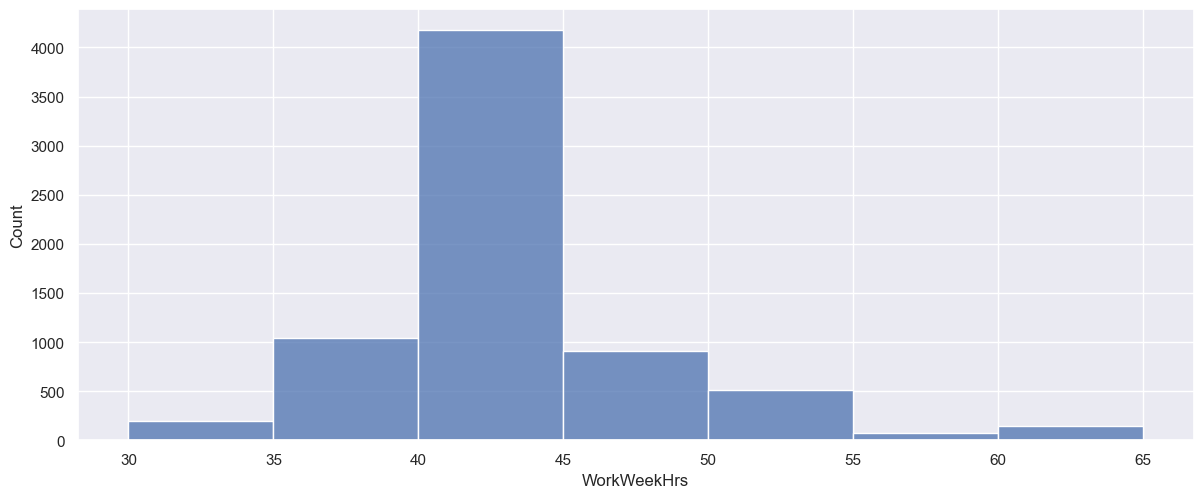

In [47]:
sns.set(rc={'figure.figsize':(14.4,5.6)})
sns.set_style("darkgrid")

ax = sns.histplot(
    df_working_hours[(df_working_hours['WorkWeekHrs']<70) &
             (df_working_hours['WorkWeekHrs']>29)],
    x  = 'WorkWeekHrs',
    binwidth=5
);


ax.bar_label(ax.containers[0])

In [48]:
np.arange(29, 71, 5)

array([29, 34, 39, 44, 49, 54, 59, 64, 69])

In [49]:
df_cut_t = pd.cut(df_working_hours['WorkWeekHrs'], np.arange(29, 71, 5)).value_counts().to_frame().reset_index().sort_values('WorkWeekHrs')

In [50]:
df_working_hours[(df_working_hours['WorkWeekHrs']>64) &
                (df_working_hours['WorkWeekHrs']<70)].shape

(14, 11)

In [51]:
bins = np.array([0,29, 34, 39, 44, 49, 54, 59, 64, 71,99])
lst_rename = ['<29','30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-70','>70']

In [52]:
df_cut_t = pd.cut(df_working_hours['WorkWeekHrs'], bins).value_counts().to_frame().reset_index().sort_values('WorkWeekHrs')

In [53]:
df_cut_t['WorkWeekHrs'] = df_cut_t['WorkWeekHrs'].cat.rename_categories(lst_rename)

In [54]:
df_cut_t.head()

,WorkWeekHrs,count
4,<29,342
5,30-34,197
1,35-39,1042
0,40-44,4182
2,45-49,906


In [55]:
df_cut_t['Percentage'] = np.round(df_cut_t['count']/df_cut_t['count'].sum()*100,1)

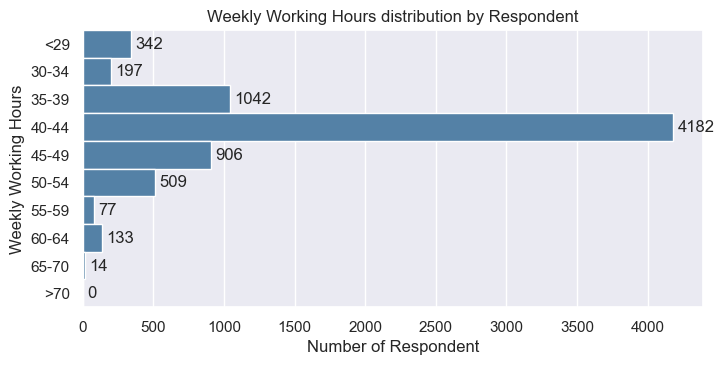

In [56]:
sns.set(rc={'figure.figsize':(8.0,3.6)})
sns.set_style("darkgrid")

ax = sns.barplot(df_cut_t,
            y = 'WorkWeekHrs',
            x = 'count',
            color = 'steelblue',
            width=1,
           );

ax.bar_label(ax.containers[0], padding=3); 
ax.set(xlabel='Number of Respondent',
       ylabel='Weekly Working Hours',
       title='Weekly Working Hours distribution by Respondent');

In [57]:
df_cut_t.reset_index(drop=True)

,WorkWeekHrs,count,Percentage
0,<29,342,4.6
1,30-34,197,2.7
2,35-39,1042,14.1
3,40-44,4182,56.5
4,45-49,906,12.2
5,50-54,509,6.9
6,55-59,77,1.0
7,60-64,133,1.8
8,65-70,14,0.2
9,>70,0,0.0


### Code Review

In [58]:
df_working_hours.head(2)

,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,DevType,Gender
0,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,Database administrator,Man
1,13,United States,USD,90000.0,Yearly,90000.0,40.0,5.0,28.0,Data or business analyst,Man


[Text(0, 0, '')]

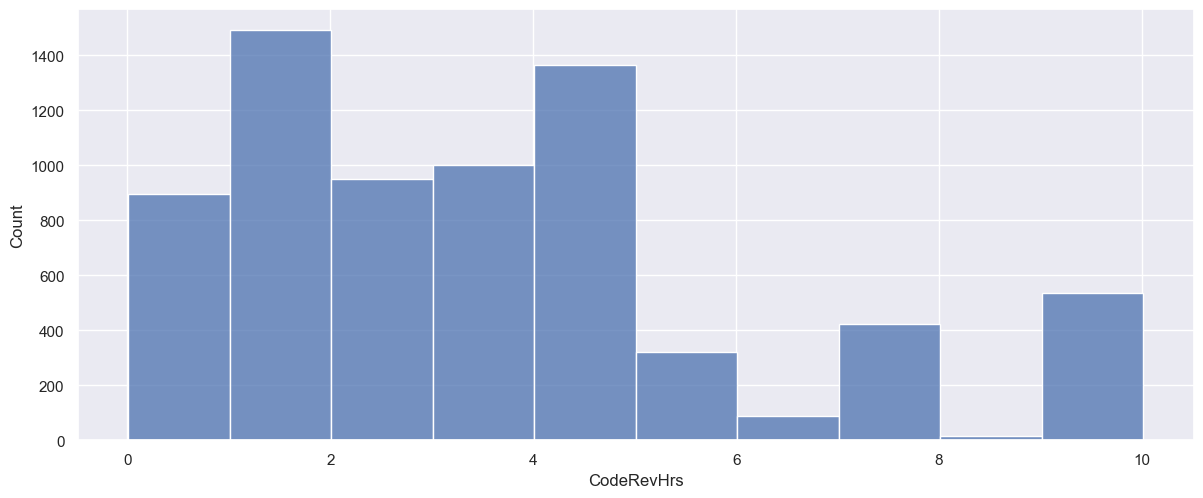

In [59]:
sns.set(rc={'figure.figsize':(14.4,5.6)})
sns.set_style("darkgrid")

ax = sns.histplot(
    df_working_hours[df_working_hours['CodeRevHrs']<11],
    x  = 'CodeRevHrs',
    binwidth=1
);


ax.bar_label(ax.containers[0])

In [60]:
n_respondent = df_working_hours['Respondent'].nunique()

In [61]:
for i in range(1,12):
    print(df_working_hours[df_working_hours['CodeRevHrs']<i]['Respondent'].nunique()/n_respondent)

0.00810591731964334
0.12320994325857876
0.32437179140772765
0.4505539043501756
0.5855174277222372
0.7699270467441232
0.8135639016482031
0.8259929748716563
0.8825992974871656
0.8846257768170764
0.9570386382058903


In [62]:
df_working_hours[df_working_hours['CodeRevHrs']<0]['Respondent'].nunique()

0

In [63]:
df_working_hours

,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,DevType,Gender
0,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,Database administrator,Man
1,13,United States,USD,90000.0,Yearly,90000.0,40.0,5.0,28.0,Data or business analyst,Man
2,17,Australia,AUD,90000.0,Yearly,65277.0,45.0,5.0,29.0,"Developer, back-end",Man
3,19,Brazil,BRL,9500.0,Monthly,31140.0,8.0,3.0,31.0,"Developer, full-stack",Man
4,23,United States,USD,69000.0,Yearly,69000.0,40.0,8.0,22.0,"Developer, full-stack",Man
...,...,...,...,...,...,...,...,...,...,...,...
7397,25133,Belgium,EUR,5000.0,Monthly,68748.0,50.0,2.0,32.0,Designer,Man
7398,25134,Ecuador,USD,800.0,Monthly,9600.0,56.0,14.0,32.0,Academic researcher,Man
7399,25137,Poland,PLN,74400.0,Yearly,19880.0,40.0,5.0,25.0,"Developer, back-end",Man
7400,25138,United States,USD,105000.0,Yearly,105000.0,40.0,5.0,34.0,Designer,Man


### How old are the developers? 

> What is the distribution by age for developers? Are developers younger or older depending on Countries? Is the salary depending on Age?

In [64]:
df_working_hours.Respondent.nunique()

7402

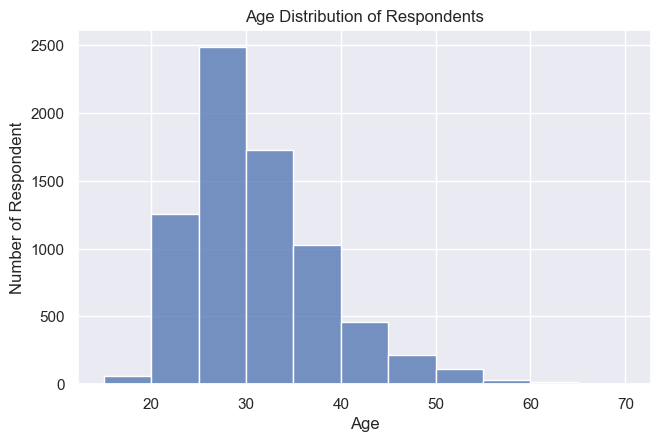

In [65]:
sns.set(rc={'figure.figsize':(7.4,4.6)})
sns.set_style("darkgrid")

ax = sns.histplot(
    df_working_hours,
    x = 'Age',
    bins=np.arange(15, 75, 5)
);

ax.set_ylabel("Number of Respondent")
ax.set_title("Age Distribution of Respondents")

plt.savefig('age_distr.png',  bbox_inches='tight')

In [66]:
df_working_hours.head(1)

,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,DevType,Gender
0,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,Database administrator,Man


In [67]:
df_country_age = (df_working_hours
 .groupby('Country')
 .agg(n_respondent = ('Respondent', 'nunique'),
     age_mean = ('Age', 'mean'),
      age_median = ('Age', 'median'),
      working_hours_mean =('WorkWeekHrs', 'mean'),
      working_hours_median =('WorkWeekHrs', 'median'),
      convcomp_total_median = ('ConvertedComp', 'median')
     )
 .reset_index()
)


In [68]:
df_country_age.sort_values('n_respondent', ascending=False)

,Country,n_respondent,age_mean,age_median,working_hours_mean,working_hours_median,convcomp_total_median
117,United States,2091,32.566236,31.0,41.770684,40.0,110000.0
46,India,585,27.229060,26.0,40.646581,40.0,11194.0
115,United Kingdom,509,31.304519,30.0,38.715619,40.0,65424.0
38,Germany,458,31.080786,30.0,38.609170,40.0,63016.0
18,Canada,294,31.918367,31.0,39.886905,40.0,68705.0
...,...,...,...,...,...,...,...
69,Myanmar,1,28.000000,28.0,8.000000,8.0,4848.0
78,Panama,1,40.000000,40.0,40.000000,40.0,42000.0
99,Sudan,1,24.000000,24.0,40.000000,40.0,1764.0
84,Republic of Korea,1,30.000000,30.0,8.000000,8.0,28595.0


C:\Users\pacor\AppData\Local\Temp\ipykernel_20092\2841494758.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=75);


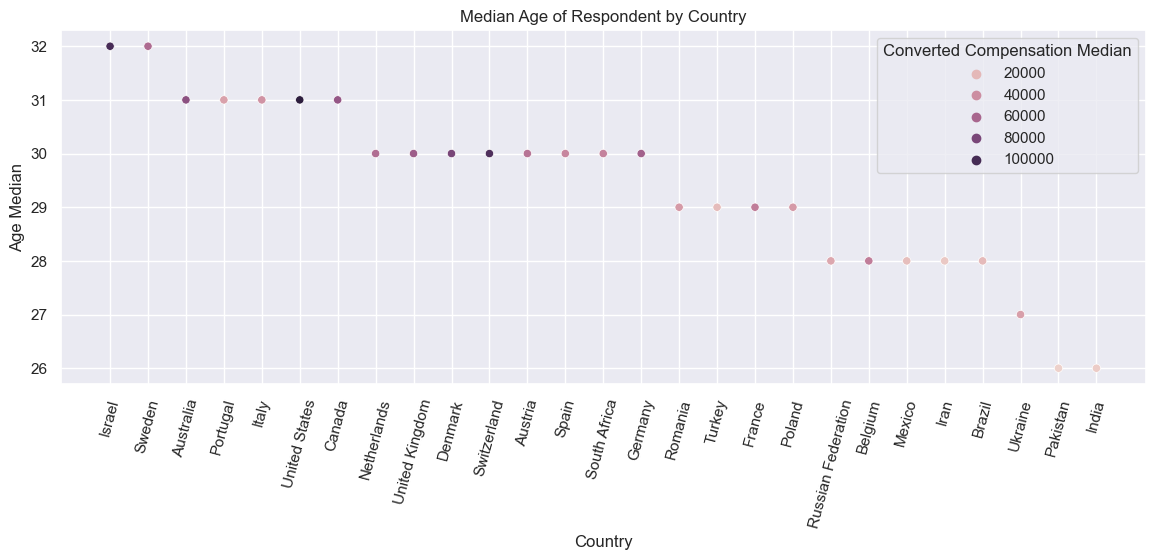

In [69]:
sns.set(rc={'figure.figsize':(14.0,4.6)})
sns.set_style("darkgrid")

my_plot = sns.scatterplot(
    df_country_age[df_country_age['n_respondent']>50].sort_values('age_median', ascending=False),
    x = 'Country',
    y = 'age_median',
    hue = 'convcomp_total_median' 
);
#my_plot()
my_plot.set_ylabel('Age Median')
my_plot.set_title("Median Age of Respondent by Country")

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=75);

plt.legend(title='Converted Compensation Median', loc='upper right')
plt.savefig('median_age_by_country.png',  bbox_inches='tight')

C:\Users\pacor\AppData\Local\Temp\ipykernel_20092\3258918441.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=75);


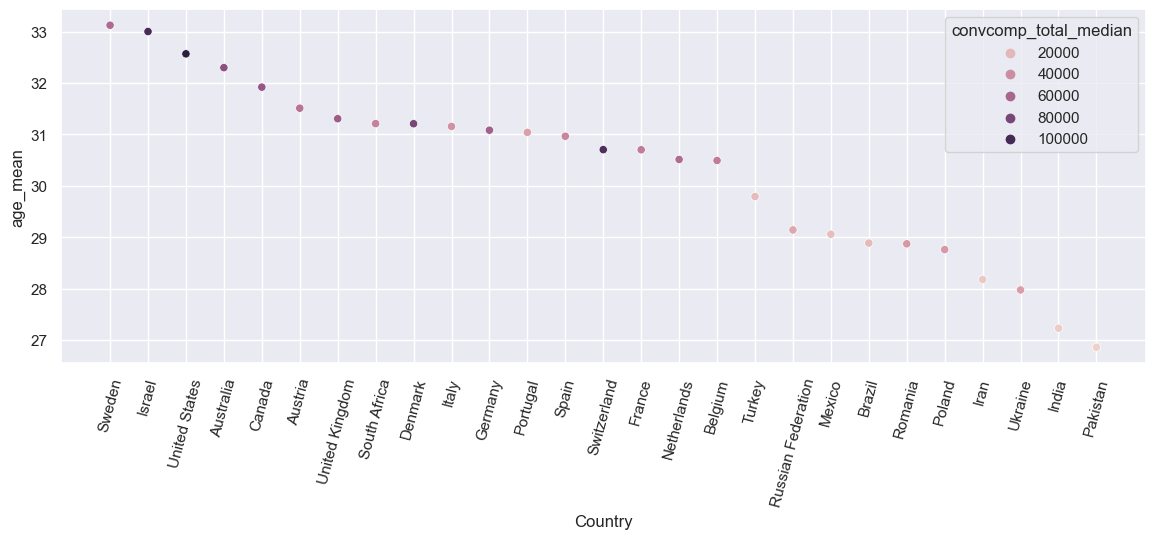

In [70]:
sns.set(rc={'figure.figsize':(14.0,4.6)})
sns.set_style("darkgrid")

my_plot = sns.scatterplot(
    df_country_age[df_country_age['n_respondent']>50].sort_values('age_mean', ascending=False),
    x = 'Country',
    y = 'age_mean',
    hue = 'convcomp_total_median' 
);

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=75);

C:\Users\pacor\AppData\Local\Temp\ipykernel_20092\4243591355.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45);


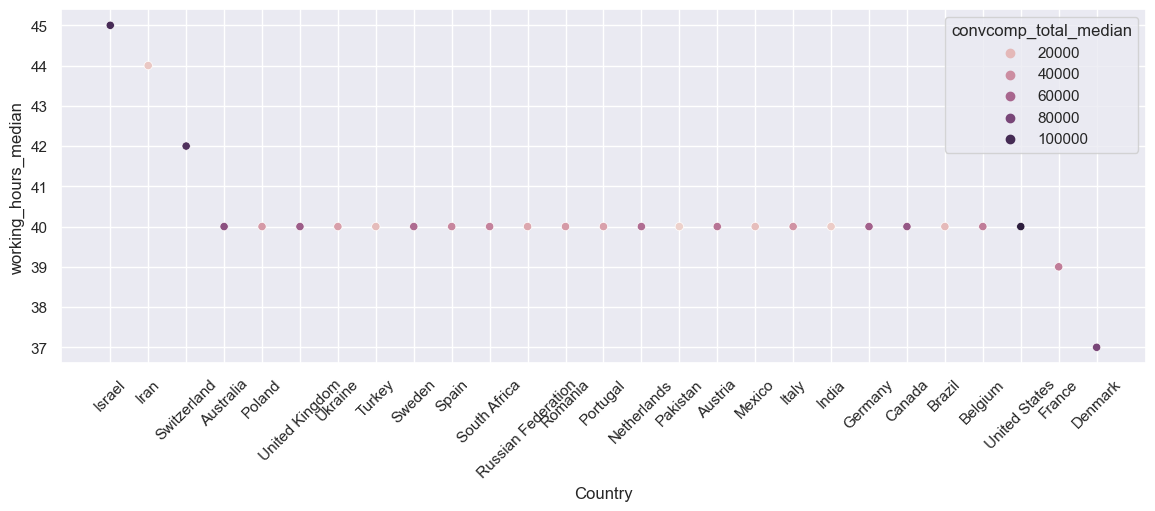

In [71]:
sns.set(rc={'figure.figsize':(14.0,4.6)})
sns.set_style("darkgrid")

my_plot = sns.scatterplot(
    df_country_age[df_country_age['n_respondent']>50].sort_values('working_hours_median', ascending=False),
    x = 'Country',
    y = 'working_hours_median',
    hue = 'convcomp_total_median' 
);

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45);

In [72]:
df_working_hours.nunique()

Respondent        7402
Country            124
CurrencySymbol      92
CompTotal         1198
CompFreq             3
ConvertedComp     2691
WorkWeekHrs         71
CodeRevHrs          44
Age                 51
DevType             24
Gender               3
dtype: int64

<Axes: xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

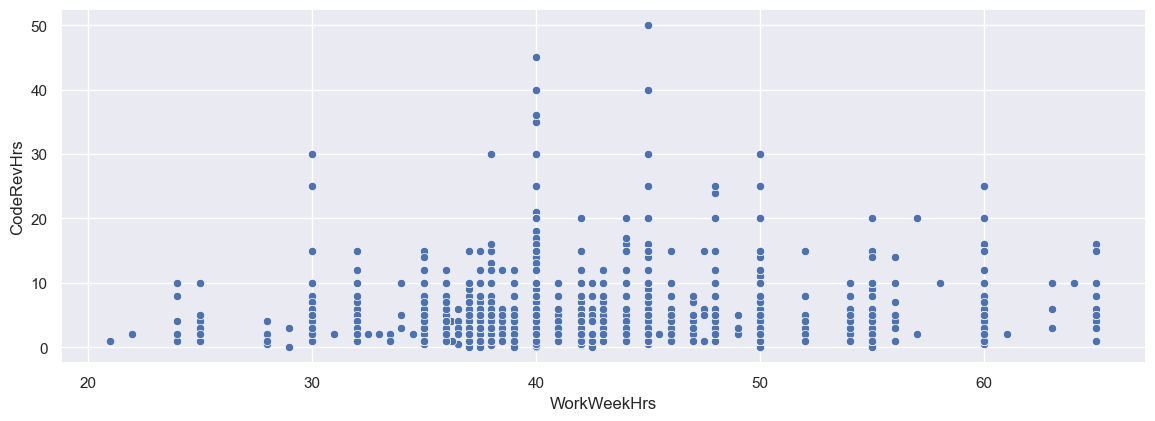

In [73]:
sns.scatterplot(
    df_working_hours[(df_working_hours['WorkWeekHrs'] > 20) &
                    (df_working_hours['WorkWeekHrs'] < 70) ],
    x = 'WorkWeekHrs',
    y = 'CodeRevHrs'
)

In [74]:
df_working_hours.head(2)

,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,DevType,Gender
0,9,New Zealand,NZD,138000.0,Yearly,95179.0,32.0,12.0,23.0,Database administrator,Man
1,13,United States,USD,90000.0,Yearly,90000.0,40.0,5.0,28.0,Data or business analyst,Man


In [75]:
df_age_vs_features = (df_working_hours
                      .groupby('Age')
                      .agg(n_respondent = ('Respondent', 'nunique'),
                           working_hours_mean =('WorkWeekHrs', 'mean'),
                           working_hours_median =('WorkWeekHrs', 'median'),
                           review_hours_mean=('CodeRevHrs', 'mean'),
                           review_hours_median=('CodeRevHrs', 'median'),
                           convcomp_total_median = ('ConvertedComp', 'median')
                          )
                      .reset_index()
)

In [76]:
df_age_vs_features.head(2)

,Age,n_respondent,working_hours_mean,working_hours_median,review_hours_mean,review_hours_median,convcomp_total_median
0,16.0,2,26.000000,26.0,1.500000,1.5,19476.0
1,17.0,3,29.333333,40.0,1.833333,2.0,63101.0


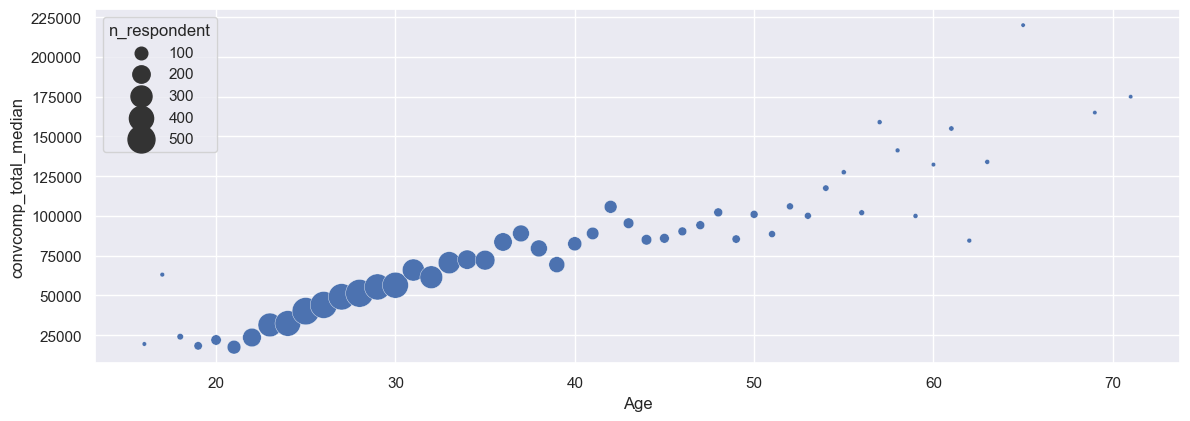

In [77]:
sns.scatterplot(
    df_age_vs_features,
    x = 'Age',
    y = 'convcomp_total_median',
    size = 'n_respondent',
    sizes = (10,400)

);

<Axes: xlabel='Age', ylabel='n_respondent'>

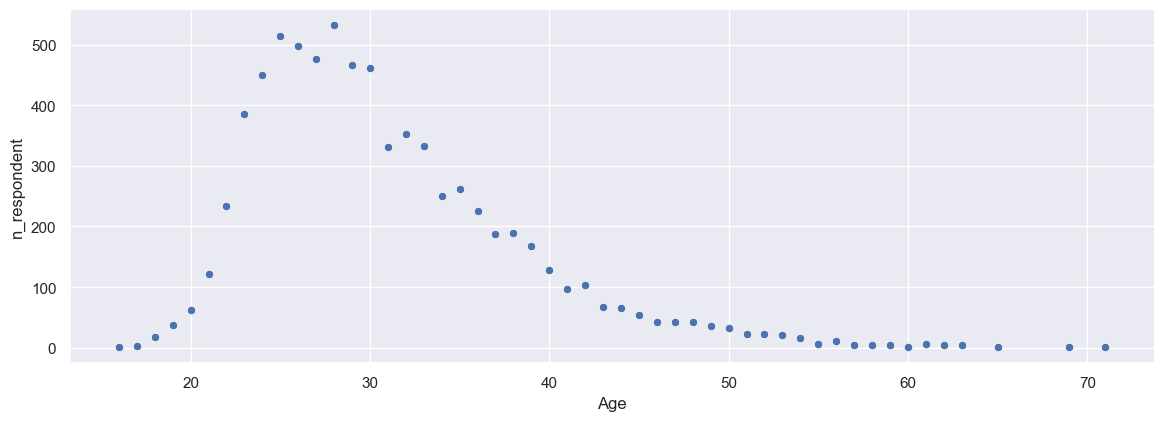

In [78]:
sns.scatterplot(
    df_age_vs_features,
    x = 'Age',
    y = 'n_respondent',
#    hue = 'working_hours_mean'
)

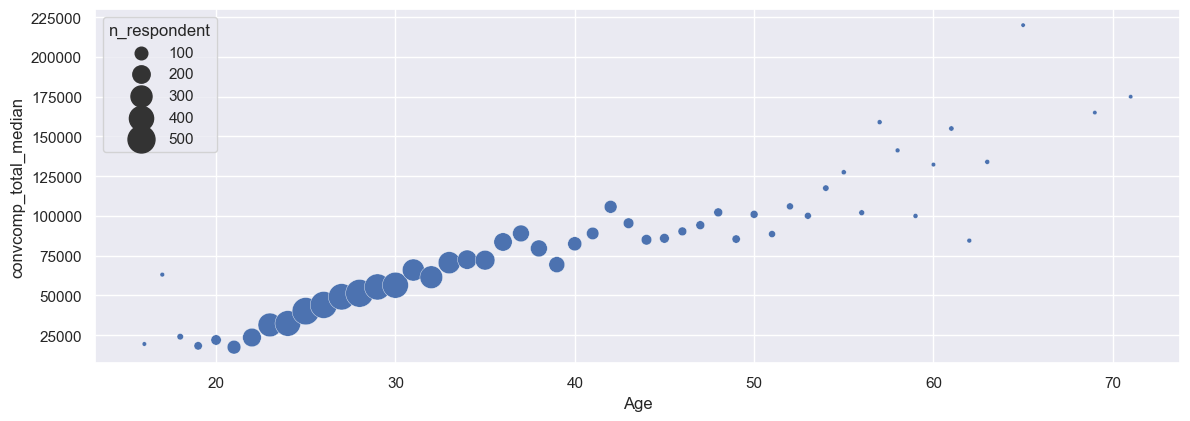

In [79]:
sns.scatterplot(
    df_age_vs_features,
    x = 'Age',
    y = 'convcomp_total_median',
    size = 'n_respondent',
    sizes = (10,400)

);

In [80]:
df_working_hours.Respondent.nunique()

7402

<Axes: xlabel='Age', ylabel='working_hours_median'>

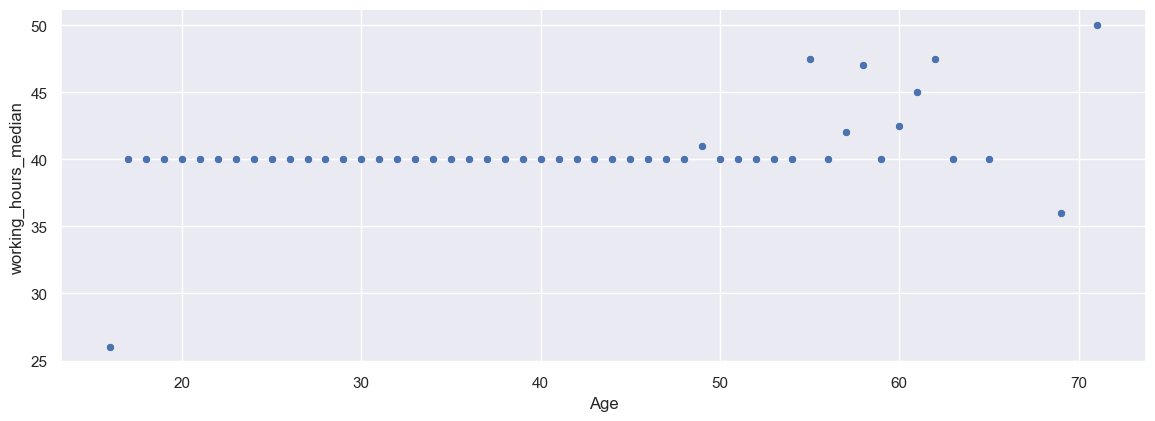

In [81]:
sns.scatterplot(
    df_age_vs_features,
    x = 'Age',
    y = 'working_hours_median',
#    hue = 'working_hours_mean'
)

In [82]:
df_cut_t['count'].sum()/df_cut_t['count']

4     21.643275
5     37.573604
1      7.103647
0      1.769967
2      8.169978
3     14.542240
7     96.129870
6     55.654135
8    528.714286
9           inf
Name: count, dtype: float64

In [83]:
df_data_t.shape

(7479, 10)

In [84]:
df_data_t.Respondent.nunique()

7437

In [85]:
8697 - 8654

43

In [86]:
QUERY = """
SELECT * 
FROM Gender
"""

df_data_gender = pd.read_sql_query(QUERY,conn)
print(df_data_gender.shape)
df_data_gender.head()

(11378, 2)


,Respondent,Gender
0,4,Man
1,9,Man
2,13,Man
3,16,Man
4,17,Man


In [87]:
df_data_gender.shape[0] - df_data_gender.Respondent.nunique()

53

In [88]:
df_data_t[df_data_t.Respondent == 6348]

,Respondent,Country,CurrencySymbol,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,Gender
1906,6348,United States,USD,150000.0,Yearly,150000.0,46.0,5.0,29.0,Man
1907,6348,United States,USD,150000.0,Yearly,150000.0,46.0,5.0,29.0,Woman


In [89]:
df_test = df_working_hours[(df_working_hours['WorkWeekHrs']<=70) &
                 (df_working_hours['WorkWeekHrs']>=30) &
                (df_working_hours['CodeRevHrs']>0) &
                (df_working_hours['CodeRevHrs']<12)]

In [90]:
df_pp = (df_test
 .groupby('WorkWeekHrs')
 .agg(review_hours_mean=('CodeRevHrs', 'mean'),
      review_hours_median=('CodeRevHrs', 'median'),
     age_mean=('Age', 'mean')) 
 .reset_index()
)

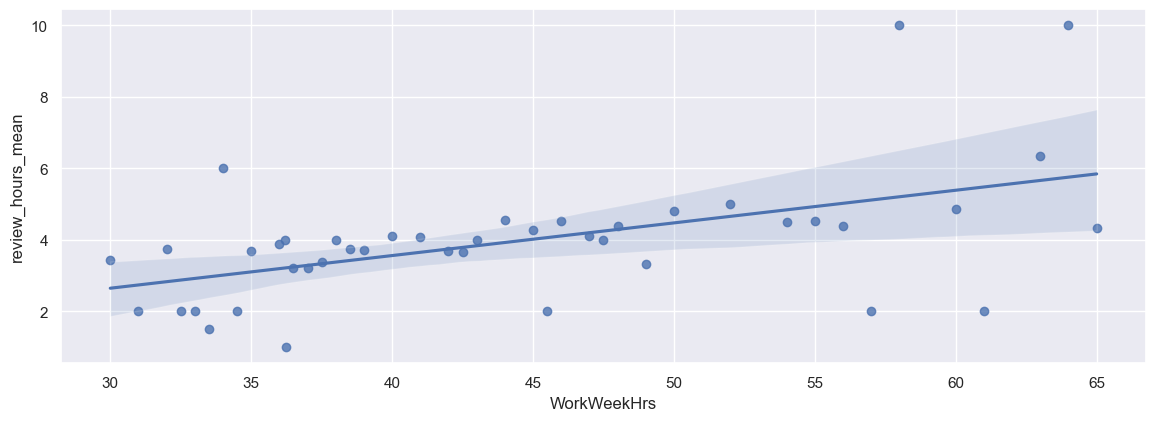

In [91]:
sns.regplot(
    df_pp,
    x = 'WorkWeekHrs',
    y = 'review_hours_mean'
);